Numpy
+ 2차원 행렬 형태의 데이터를지원하지만, 데이터의 속성을 표시하는 행, 열의 레이블은 없다.
#### => Pandas 패키지 사용
+ numpy 기반으로 처리속도가 매우 빠르다.
+ Series, DataFrame 두가지 데이터 구조를 제공한다.
+ 각 행, 열에 이름이 부여되며 행은 index, 열은 columns라고 부른다.

In [35]:
import numpy as np
import pandas as pd

In [36]:
#Series 클래스에 리스트를 넘겨주면 1차원 벡터구조의 시리즈 데이터 생성
series = pd.Series([1, 3, np.nan, 4])   #np.nan은 결측값

series

0    1.0
1    3.0
2    NaN
3    4.0
dtype: float64

In [37]:
#Series 데이터가 여러개 모이면 2차원 구조의 DataFrame
name_series = pd.Series(['Jane', 'Bonnie', 'Rachel'])
age_series = pd.Series([24, 22, 28])
school_series = pd.Series(['울산대', '부산대', '영남대'])
grade_series = pd.Series([4.35, 4.23, 4.25])

df = pd.DataFrame([name_series, age_series, school_series, grade_series]).T  #리스트 형식
df.columns=['이름', '나이', '학교', '학점']
df

,이름,나이,학교,학점
0,Jane,24,울산대,4.35
1,Bonnie,22,부산대,4.23
2,Rachel,28,영남대,4.25


In [38]:
df = pd.DataFrame({'이름':name_series,
                   '나이':age_series,
                   '학교':school_series,
                   '학점':grade_series})   #딕셔너리 형식(key에 열이름, value에 데이터값)
df

,이름,나이,학교,학점
0,Jane,24,울산대,4.35
1,Bonnie,22,부산대,4.23
2,Rachel,28,영남대,4.25


#### Pandas로 데이터 읽고 확인하기
+ pd.read_csv() 함수를 이용하면 csv 파일을 읽어들여 DataFrame으로 바꾸는 작업을 간단히 할 수 있다.

In [39]:
url = 'https://github.com/dknife/ML/raw/main/data/'
file = url + 'vehicle_prod.csv'

df = pd.read_csv(file, index_col=0)   #첫번째 열(국가)을 index로 이용
df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


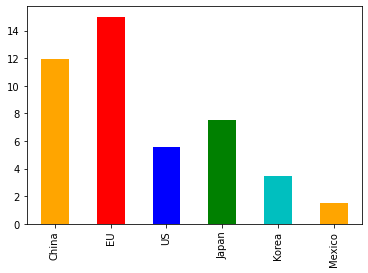

In [40]:
#시각화(열 추출 => .plot()함수 적용)
df['2009'].plot(kind='bar', color=['orange', 'r', 'b', 'g', 'c']);

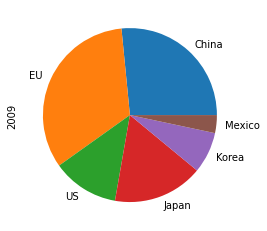

In [41]:
df['2009'].plot(kind='pie');

#### DataFrame 슬라이싱, 열 추가
+ df.head(x) : 처음부터 x개의 행 추출
+ df.tail(x) : 마지막 x개의 행 추출
+ df[a:b] : a번째 행부터 b-1번째 행까지 추출
+ df.loc[row, column] : 행, 열의 이름을 사용해 데이터 추출
+ df.iloc[row, column] : 행, 열의 index를 사용해 데이터 추출

In [42]:
df['total'] = df.sum(axis=1)   #numpy 기반으로 모든 행의 원소를 더함
df

,2007,2008,2009,2010,2011,total
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35


#### Pandas를 이용한 데이터 분석
+ .describe() : 각 속성값들의 count, mean, std, min, max 등을 쉽게 알 수 있다.
+ .count(), .mean() 등을 통해 특정 분석값만 볼 수도 있다.

In [44]:
url = 'https://github.com/dknife/ML/raw/main/data/'
file = url + 'weather.csv'

df = pd.read_csv(file, index_col=0, encoding='CP949')
print(df.shape)
df

(3653, 3)


,평균기온,최대풍속,평균풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


In [45]:
df.describe()

,평균기온,최대풍속,평균풍속
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


#### 데이터 정제와 결측값 처리
+ 실제 데이터는 대부분 완벽하지 않고, 상당수의 결측값을 가지고 있다.
+ 따라서 데이터 처리 전에 반드시 데이터 정제가 필요하다.
+ 결측값은 dropna() 또는 fillna()를 사용해 처리할 수 있다.

In [47]:
df.count()  #각 열의 개수

평균기온    3653
최대풍속    3649
평균풍속    3647
dtype: int64

In [56]:
df[df['평균풍속'].isna()]

,평균기온,최대풍속,평균풍속
일시,,,
2012-02-11,-0.7,NaN,NaN
2012-02-12,0.4,NaN,NaN
2012-02-13,4.0,NaN,NaN
2015-03-22,10.1,11.6,NaN
2015-04-01,7.3,12.1,NaN
2019-04-18,15.7,11.7,NaN


In [58]:
df['평균기온'].fillna(df['평균기온'].mean(), inplace=True)
df['최대풍속'].fillna(df['최대풍속'].mean(), inplace=True)
df['평균풍속'].fillna(df['평균풍속'].mean(), inplace=True)

In [60]:
df[df.isna()].count()

평균기온    0
최대풍속    0
평균풍속    0
dtype: int64

#### Grouping, Filtering
+ .groupby() : 특정 값에 기반하여 데이터를 그룹으로 묶을 때 사용한다.


In [63]:
df = pd.read_csv(file, encoding='CP949')

df['month'] = pd.DatetimeIndex(df['일시']).month
means = df.groupby('month').mean()   #월별로 데이터를 묶음
means

,평균기온,최대풍속,평균풍속
month,,,
1,1.598387,8.158065,3.757419
2,2.136396,8.225357,3.946786
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355
6,19.616667,6.945667,3.461000
7,23.328387,7.322581,3.877419
8,24.748710,6.853226,3.596129
9,20.323667,6.896333,3.661667


In [65]:
means[means['평균풍속'] > 4.0]  #3,4,5월의 평균풍속만 4.0을 넘음

,평균기온,최대풍속,평균풍속
month,,,
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355


#### pivot, concat
+ 테이블 구조를 변경하는 함수들

In [67]:
df_1 = pd.DataFrame({'item':['ring0', 'ring0', 'ring1', 'ring1'],
                     'type':['Gold', 'Silver', 'Gold', 'Bronze'],
                     'price':[20000, 10000, 50000, 30000]})
df_1   #ring0, ring1이 2개씩 => item 컬럼을 index로, type 컬럼을 columns로

,item,type,price
0,ring0,Gold,20000
1,ring0,Silver,10000
2,ring1,Gold,50000
3,ring1,Bronze,30000


In [70]:
df_2 = df_1.pivot(index='item', columns='type', values='price')
df_2

type,Bronze,Gold,Silver
item,,,
ring0,NaN,20000.0,10000.0
ring1,30000.0,50000.0,NaN


In [75]:
df_1 = pd.DataFrame({'A':['a10', 'a11', 'a12'],
                     'B':['b10', 'b11', 'b12'],
                     'C':['c10', 'c11', 'c12']},
                    index=['가', '나', '다'])
df_2 = pd.DataFrame({'B':['b23', 'b24', 'b25'],
                     'C':['c23', 'c24', 'c25'],
                     'D':['d23', 'd24', 'd25']},
                    index=['다', '라', '마'])
print(df_1)
print(df_2)

     A    B    C
가  a10  b10  c10
나  a11  b11  c11
다  a12  b12  c12
     B    C    D
다  b23  c23  d23
라  b24  c24  d24
마  b25  c25  d25


In [76]:
pd.concat([df_1, df_2], axis=0, join='outer')   #df_1,df_2를 행을 늘려 붙여(아래로) 합집합

,A,B,C,D
가,a10,b10,c10,NaN
나,a11,b11,c11,NaN
다,a12,b12,c12,NaN
다,NaN,b23,c23,d23
라,NaN,b24,c24,d24
마,NaN,b25,c25,d25


In [77]:
pd.concat([df_1, df_2], axis=1, join='outer')    #df_1,df_2를 열을 늘려 붙여(옆으로) 합집합

,A,B,C,B,C,D
가,a10,b10,c10,NaN,NaN,NaN
나,a11,b11,c11,NaN,NaN,NaN
다,a12,b12,c12,b23,c23,d23
라,NaN,NaN,NaN,b24,c24,d24
마,NaN,NaN,NaN,b25,c25,d25


#### merge
+ join 연산 같은 방식의 데이터 병합을 지원하는 pandas 함수이다.
+ df_1.merge(df_2, how='', on='')
+ how : left / right / inner / outer
    + outer 방식이 기본이며, left는 outer 한 결과에서 df_1에 존재하는 키를 가진 값만 추출한 것이라고 보면 된다.
+ on : join 연산에 사용할 레이블(df_1, df_2에 공통으로 있는 컬럼이어야 함)

In [79]:
print('left outer \n', df_1.merge(df_2, how='left', on='B'))
print('right outer \n', df_1.merge(df_2, how='right', on='B'))
print('full outer \n', df_1.merge(df_2, how='outer', on='B'))
print('inner \n', df_1.merge(df_2, how='inner', on='B'))   #원래 df_1, df_2에 있던 index(가,나,다,라,마)가 사라짐

left outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
right outer 
      A    B  C_x  C_y    D
0  NaN  b23  NaN  c23  d23
1  NaN  b24  NaN  c24  d24
2  NaN  b25  NaN  c25  d25
full outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
3  NaN  b23  NaN  c23  d23
4  NaN  b24  NaN  c24  d24
5  NaN  b25  NaN  c25  d25
inner 
 Empty DataFrame
Columns: [A, B, C_x, C_y, D]
Index: []


In [81]:
df_3 = df_1.merge(df_2, how='outer',
                  left_index=True, right_index=True)
df_3

,A,B_x,C_x,B_y,C_y,D
가,a10,b10,c10,NaN,NaN,NaN
나,a11,b11,c11,NaN,NaN,NaN
다,a12,b12,c12,b23,c23,d23
라,NaN,NaN,NaN,b24,c24,d24
마,NaN,NaN,NaN,b25,c25,d25
